## OpeningFitsAsImage
#### See this documentation:  https://python4astronomers.github.io/astropy/fits.html
Anwesha Sahu, MSci Project, ML + Radio Astronomy

In [1]:
import astropy
import numpy as np
from astropy.nddata import CCDData
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.wcs import WCS
import ccdproc
from ccdproc import trim_image
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cv2
from PIL import Image, ImageDraw

In [2]:
hdulist = fits.open('test.fits')
hdulist.info()
# HDU is header data unit
hdu = hdulist[0]
hdu.data.shape
hdu.header

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (7500, 7500)   float64   


SIMPLE  =                    T /                                                
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 /                                                
NAXIS1  =                 7500 / length of data axis 1                          
NAXIS2  =                 7500 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-SIN'           / Axis type                                      
CDELT1  =        -4.166667E-04 / Axis coordinate increment                      
CRPIX1  =         3.750000E+03 / Axis coordinate reference pixel                
CROTA1  =         0.000000E+00 / Axis coordinate rotation                       
CRVAL1  =   2.885000000000E+

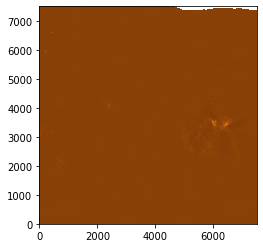

In [3]:
color = cm.get_cmap('PuOr', 230)
plt.imshow(hdu.data[0:], origin = 'lower', cmap = color)
plt.savefig('test.png')

In [4]:
# Find brightest pixel in matplotlib figure
img_CV = cv2.imread('test.png')
img_PIL = Image.open('test.png')
width, height = img_PIL.size
print('width, height = ', width, height)
#cropping
left = 115
top = 0.15*height
right = 325
bottom = 0.85*height
im1 = img_PIL.crop((left, top, right, bottom))  #crop to get relevant section
im1.show()
im1.save('test.png')

width, height =  432 288


#### Making circle to enclose brightest regions
Check examples here
- https://www.programcreek.com/python/example/77056/cv2.minEnclosingCircle
- Used this StackOverflow solution: 
https://stackoverflow.com/questions/66571431/python-cv2-determine-radius-of-bright-spot-in-image

- cv2 documentation for Contour Features https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html

In [5]:
# read image as grayscale
img = cv2.imread('test.png')

hh, ww = img.shape[:2]
# shave off white region on right side
img = img[0:hh, 0:ww-2]
# convert to gray
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# median filter
median = cv2.medianBlur(gray, 3)
# do canny edge detection
canny = cv2.Canny(median, 100, 200)
# get canny points
# numpy points are (y,x)
points = np.argwhere(canny>0)

# get min enclosing circle
radius = 15
center = cv2.minEnclosingCircle(points)[0]
print('center:', center, 'radius:', radius)

# draw circle on copy of input
result = img.copy()
x = int(center[1])
y = int(center[0])
rad = int(radius)
image = cv2.circle(result, (x,y), rad, (255,255,255), 1)

# write results
cv2.imwrite("test_canny.jpg", canny)
cv2.imwrite("test_circle.jpg", result)

#img_log = np.log(image)


#type(image)
#log_image = np.log(image)
#log_image_rounded = np.around((log_image))

print(center[0])

center: (109.5, 185.5) radius: 15
109.5


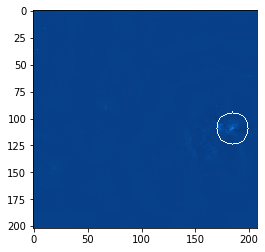

In [6]:
#plt.imshow(cv2.circle(result, (x,y), rad, (255,255,255), 1)) #Sanity check
plt.imshow(image)

In [24]:
x0 = center[1] - 15
y0 = center[0] - 15
x1 = center[1] + 15
y1 = center[0] + 15
xy = [(x0,y0), (x1,y1)]
start = 0
end = 360


In [25]:
img = Image.open("test_circle.jpg")
#ImageDraw.Draw.pieslice(xy,start,end, fill = None, outline = None, width = 1)

In [30]:
with Image.open("test_circle.jpg") as im:
    draw = ImageDraw.Draw(im)
    circle = draw.pieslice(xy, start, end, fill=None, outline=None, width=1)
    

AttributeError: 'ImageDraw' object has no attribute 'show'

In [6]:
# write results
cv2.imwrite("test_canny.jpg", canny)
cv2.imwrite("test_circle.jpg", result)


##### Making a mask -- using cloud detector method

In [7]:
#FIX THIS